<style>
.markdown-cell {
    font-family: "Times New Roman", Times, serif;
}
</style>


#   <h1 style="font-family: 'Times New Roman', Times, serif; font-size: 2.6em; font-weight: bold; margin-bottom: 12px; color: #222;">
#     Tugas Praktikum Signal Processing
#   </h1>
#   <p style="font-family: 'Times New Roman', Times, serif; font-size: 1.5em; margin-top: 0;">
#     oleh <b>Harvest Walukow</b>, 164231104
#   </p>

In [2]:
import os
import glob
import fnmatch
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import math
import tensorflow as tf
import kagglehub

In [3]:
data_path = kagglehub.dataset_download("abdallahaboelkhair/heartbeat-sound")
print(os.listdir(data_path))

100%|██████████| 110M/110M [00:03<00:00, 31.4MB/s]

Extracting files...


['Heartbeat_Sound']


In [6]:
train_data      = data_path + "/Heartbeat_Sound"
unlabel_data    = data_path  + "/Heartbeat_Sound/unlabel/"

normal_data     = train_data + '/normal/'
murmur_data     = train_data + '/murmur/'
extrastole_data = train_data + '/extrastole/'
artifact_data   = train_data + '/artifact/'
extrahls_data   = train_data + "/extrahls/"

In [7]:
print("Normal files:", len(os.listdir(normal_data)))
print("Murmur files:", len(os.listdir(murmur_data)))
print("Extrastole files", len(os.listdir(extrastole_data)))
print("Artifact files:", len(os.listdir(artifact_data)))
print("Extrahls files:", len(os.listdir(extrahls_data)))

print('TOTAL TRAIN SOUNDS:', len(os.listdir(normal_data))
                              + len(os.listdir(murmur_data))
                              + len(os.listdir(extrastole_data))
                              + len(os.listdir(artifact_data))
                              + len(os.listdir(extrahls_data)))

Normal files: 351
Murmur files: 129
Extrastole files 46
Artifact files: 40
Extrahls files: 19
TOTAL TRAIN SOUNDS: 585


In [8]:
print("Test sounds: ", len(os.listdir(unlabel_data)))

Test sounds:  247


# EDA and Visualization

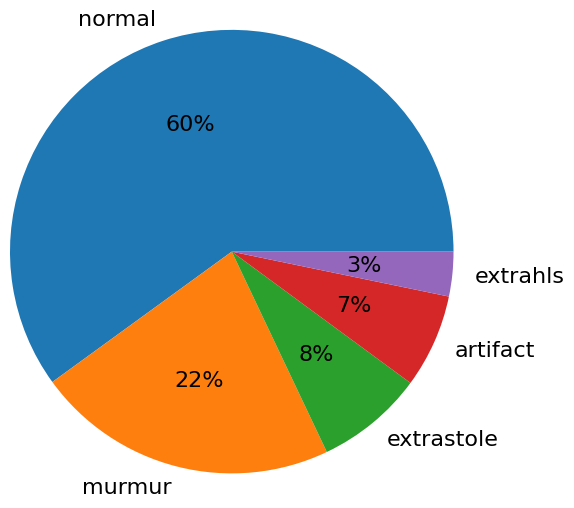

In [9]:
x = np.array([len(os.listdir(normal_data)),
              len(os.listdir(murmur_data)),
              len(os.listdir(extrastole_data)),
              len(os.listdir(artifact_data)),
              len(os.listdir(extrahls_data))])
labels = ['normal', 'murmur', 'extrastole', 'artifact', 'extrahls']
plt.pie(x, labels = labels, autopct = '%.0f%%', radius= 1.5, textprops={'fontsize': 16})
plt.show()

## Visualizing random sample

In [10]:
def visulize_random_sample(folder_name):
  #to hear the audio sample
  random_sample             = np.random.randint(0,len(os.listdir(folder_name)))
  sample_sound              = os.listdir(folder_name)[random_sample]
  sample_address            = folder_name + sample_sound
  sample_sound, sample_rate = librosa.load(sample_address)
  sample_audio              = ipd.Audio(sample_sound, rate=sample_rate)
  return sample_audio


In [11]:
visulize_random_sample(normal_data)

## *1. Normal sound*

In [12]:
# Choose random sound from normal folder
random_normal= np.random.randint(0,len(os.listdir(normal_data)))
normal_sound = os.listdir(normal_data)[random_normal]
normal_sound_address = normal_data+normal_sound
normal_sound_sample,sample_rate = librosa.load(normal_sound_address)
ipd.Audio(normal_sound_sample,rate=sample_rate)

### Waveform

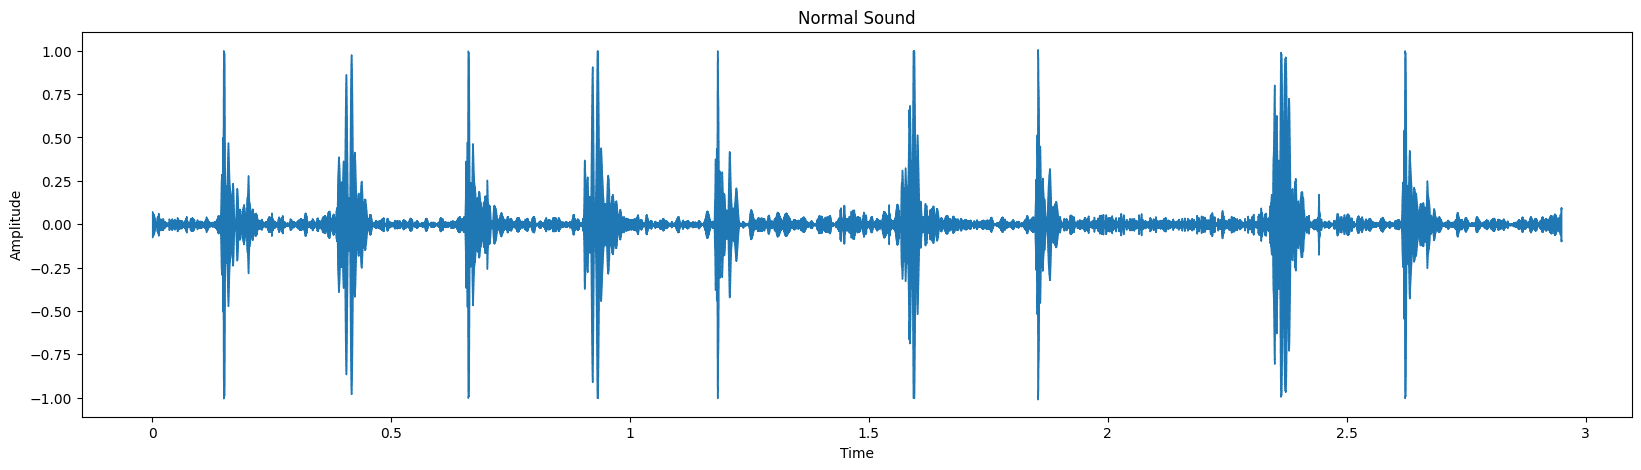

In [13]:
#librosa.display.waveshow(data, sr=sampling_rate)

plt.figure(figsize=(20,5))
librosa.display.waveshow(normal_sound_sample, sr = sample_rate)
plt.title("Normal Sound")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

### Spectrum

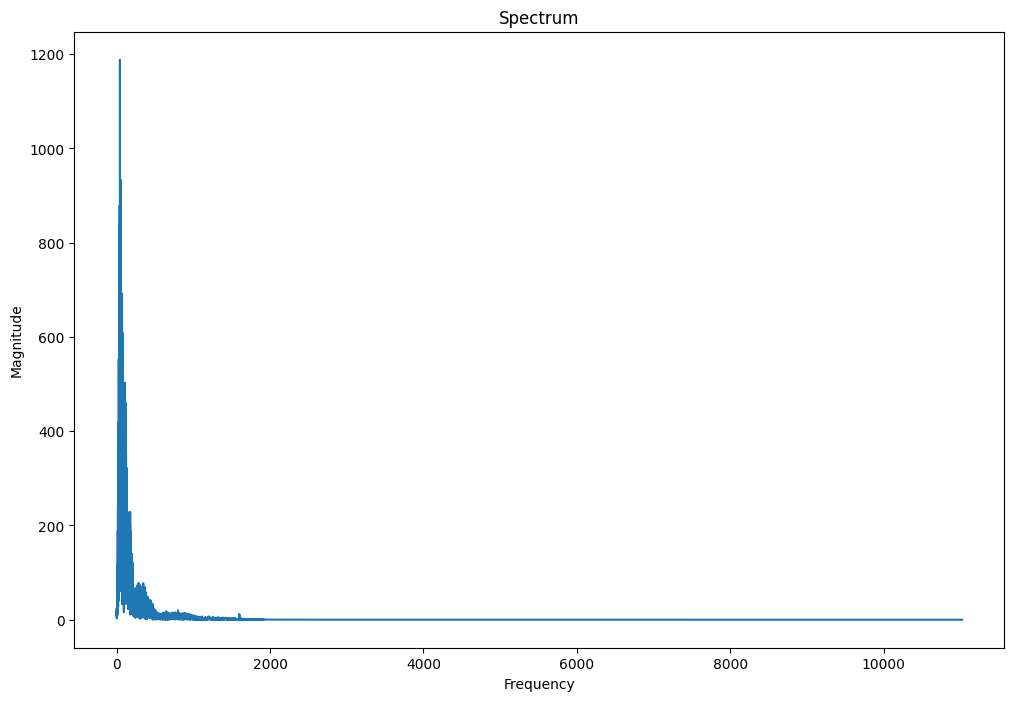

In [14]:
fft_normal = np.fft.fft(normal_sound_sample)
magnitude_normal = np.abs(fft_normal)
freq_normal = np.linspace(0,sample_rate, len(magnitude_normal))
half_freq = freq_normal[:int(len(freq_normal)/2)]
half_magnitude = magnitude_normal[:int(len(freq_normal)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq,half_magnitude)
plt.title("Spectrum")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

### Spectogram

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram')

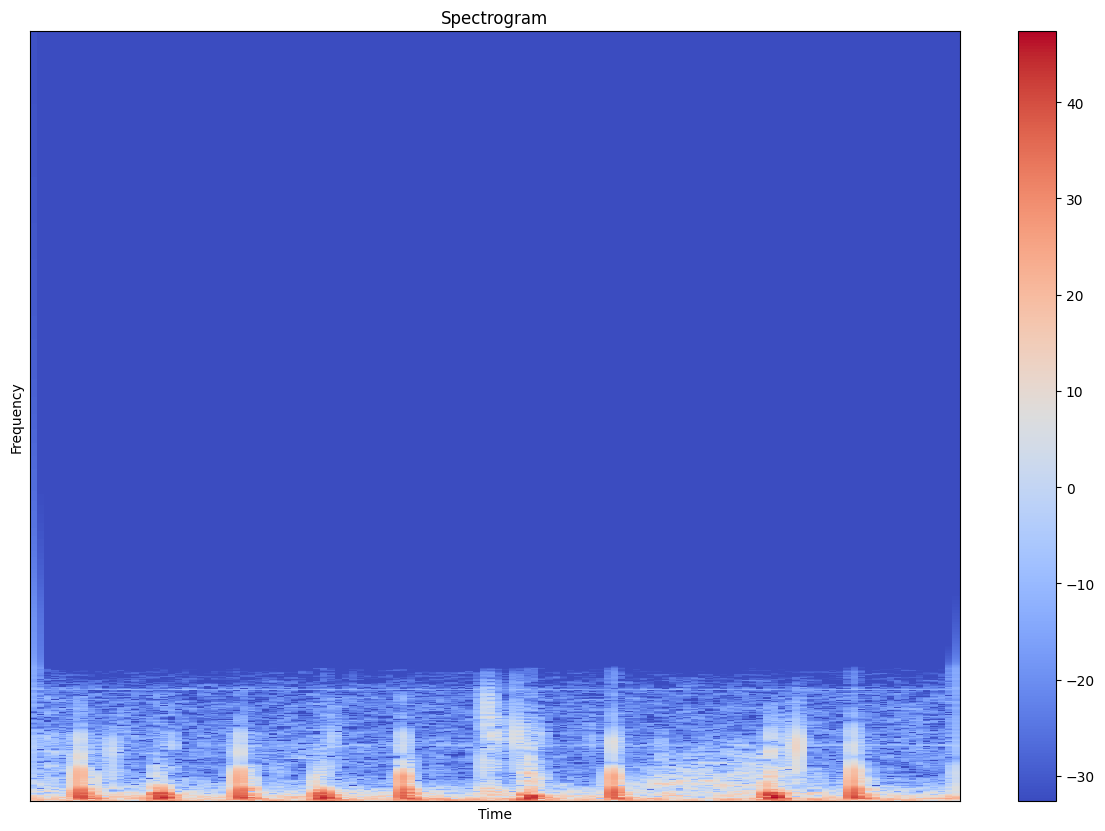

In [15]:
hop_length = 512
n_fft = 2048

hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

stft_normal = librosa.stft(normal_sound_sample, n_fft=n_fft, hop_length=hop_length)

spectrogram = np.abs(stft_normal)
log_spectrogram = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
#plt.set_cmap("YlOrBr")
plt.title("Spectrogram")

### MFCCs

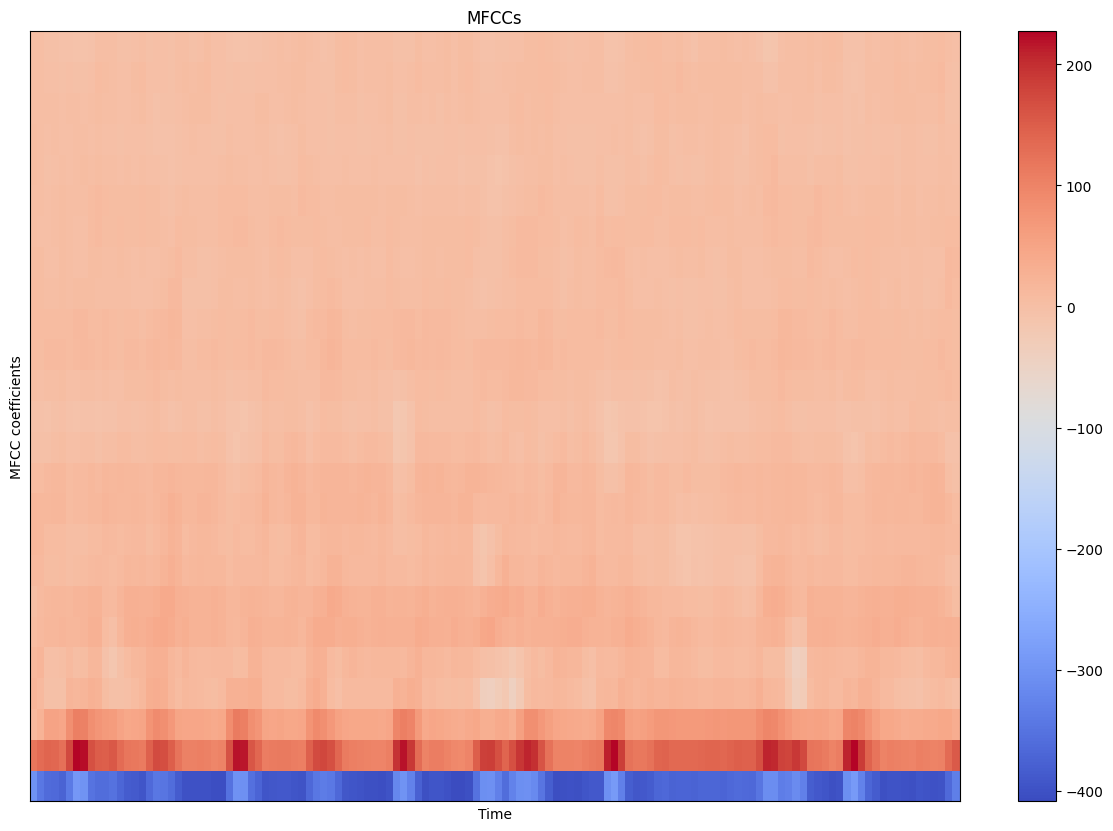

In [17]:
MFCCs = librosa.feature.mfcc(y=normal_sound_sample, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
#plt.set_cmap("YlOrBr")
plt.title("MFCCs")
plt.show()

## *2. Murmur sound*

In [18]:
random_murmur= np.random.randint(0,len(os.listdir(murmur_data)))
murmur_sound = os.listdir(murmur_data)[random_murmur]
murmur_sound_address = murmur_data+murmur_sound
murmur_sound_sample,sample_rate = librosa.load(murmur_sound_address)
ipd.Audio(murmur_sound_sample,rate=sample_rate)

### Waveform

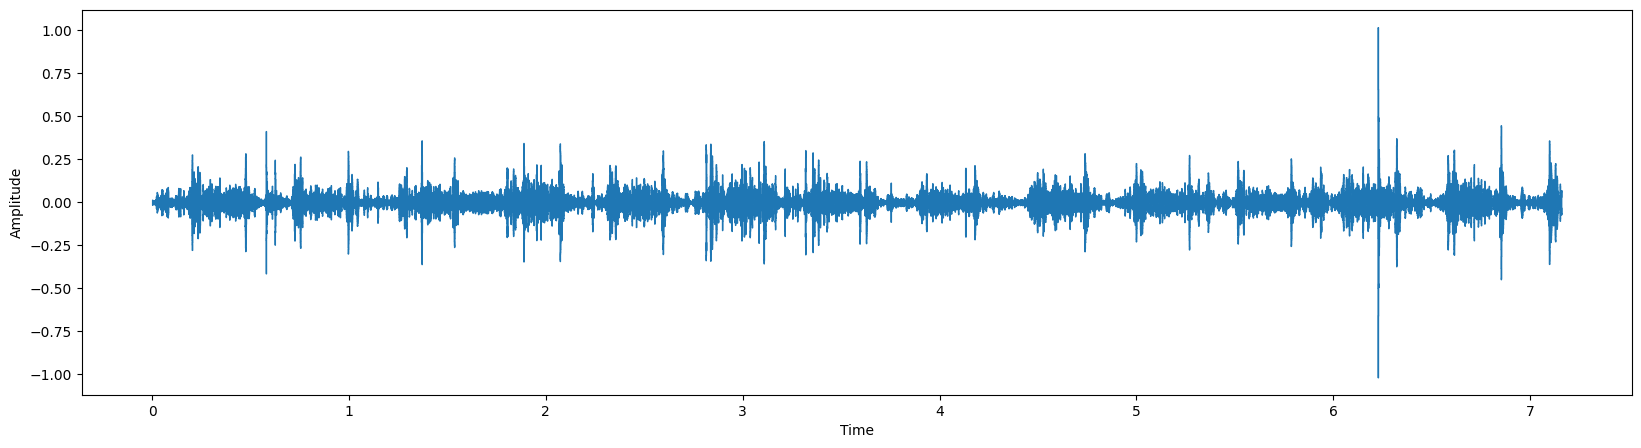

In [19]:
plt.figure(figsize=(20,5))
librosa.display.waveshow(murmur_sound_sample, sr = sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

### Spectrum

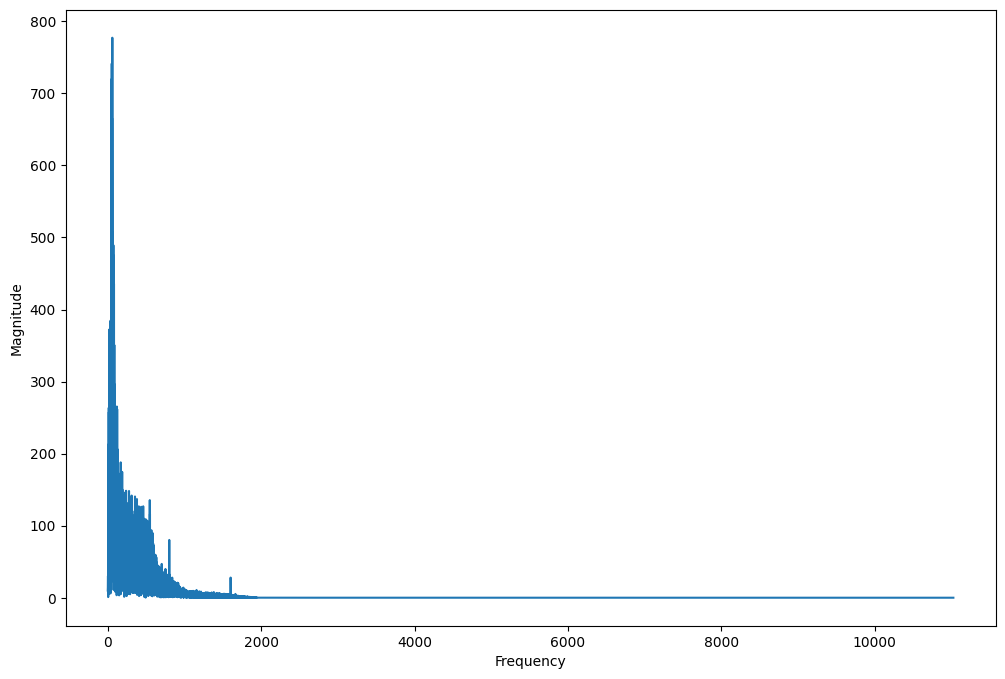

In [20]:
fft_murmur = np.fft.fft(murmur_sound_sample)
magnitude_murmur = np.abs(fft_murmur)
freq_murmur = np.linspace(0,sample_rate, len(magnitude_murmur))
half_freq = freq_murmur[:int(len(freq_murmur)/2)]
half_magnitude = magnitude_murmur[:int(len(freq_murmur)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq,half_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

### Spectogram

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram_murmur')

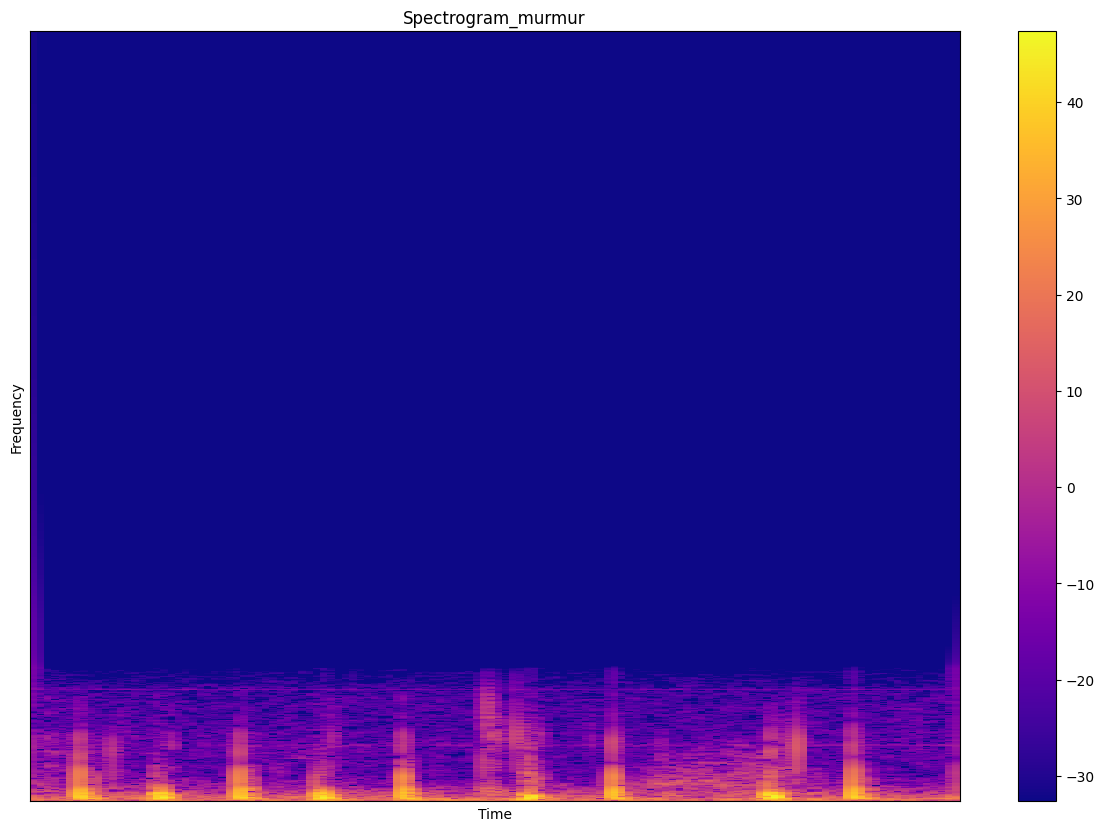

In [21]:
hop_length = 512
n_fft = 2048

hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

stft_murmur = librosa.stft(murmur_sound_sample, n_fft=n_fft, hop_length=hop_length)

spectrogram_murmur = np.abs(stft_murmur)
log_spectrogram_murmur = librosa.amplitude_to_db(spectrogram_murmur)

plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.set_cmap("plasma")
plt.title("Spectrogram_murmur")

### MFCCs

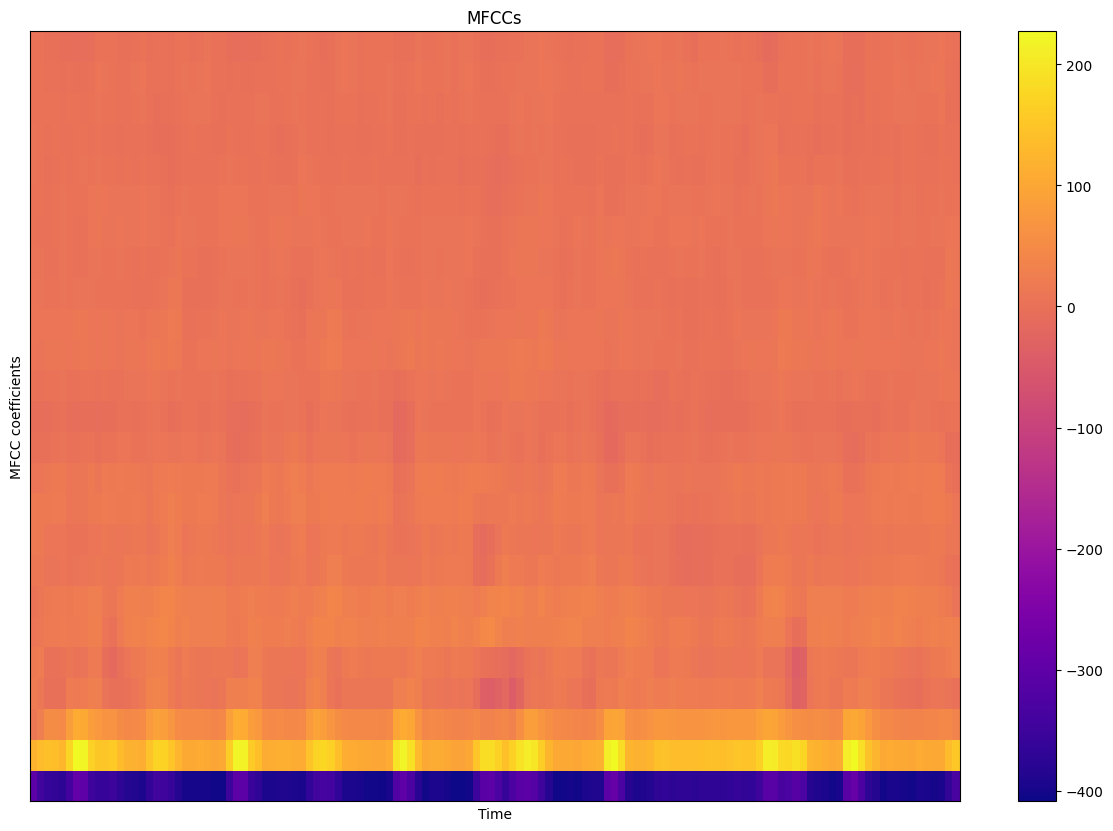

In [23]:
MFCCs_murmur = librosa.feature.mfcc(y=murmur_sound_sample, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.set_cmap("plasma")
plt.title("MFCCs")
plt.show()

## *3. Extrasystole sound*

In [24]:
random_extrastole= np.random.randint(0,len(os.listdir(extrastole_data)))
extrastole_sound = os.listdir(extrastole_data)[random_extrastole]
extrastole_sound_address = extrastole_data+extrastole_sound
extrastole_sound_sample,sample_rate = librosa.load(extrastole_sound_address)
ipd.Audio(extrastole_sound_sample,rate=sample_rate)

### Waveform

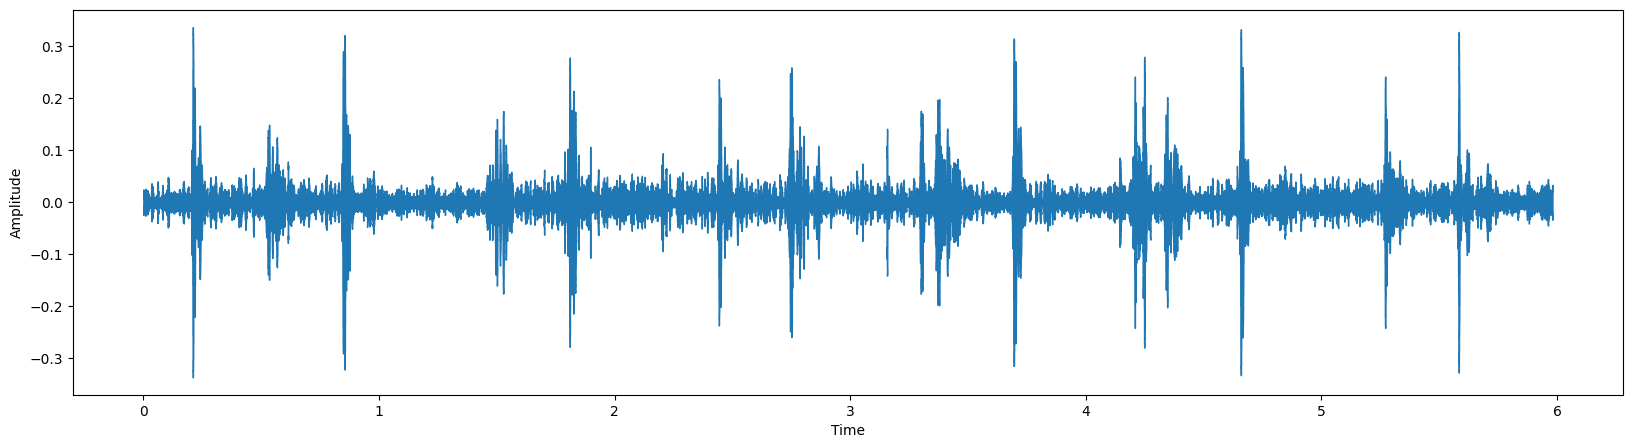

In [25]:
plt.figure(figsize=(20,5))
librosa.display.waveshow(extrastole_sound_sample, sr = sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

### Spectrum

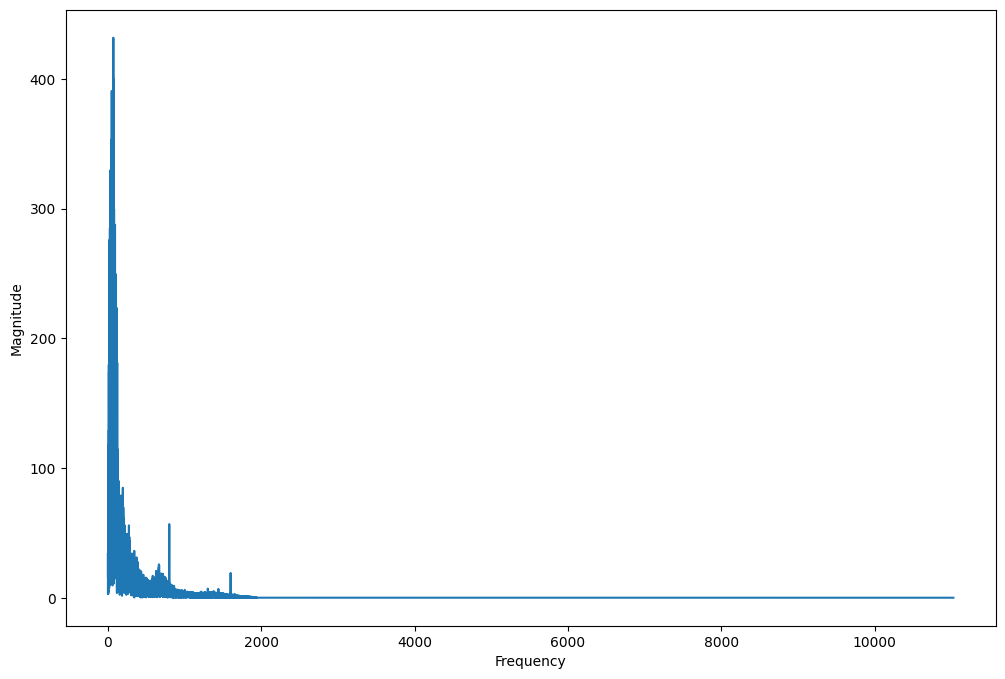

In [26]:
fft_extrastole = np.fft.fft(extrastole_sound_sample)
magnitude_extrastole = np.abs(fft_extrastole)
freq_extrastole = np.linspace(0,sample_rate, len(magnitude_extrastole))
half_freq = freq_extrastole[:int(len(freq_extrastole)/2)]
half_magnitude = magnitude_extrastole[:int(len(freq_extrastole)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq,half_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

### Spectogram

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram_extrastole')

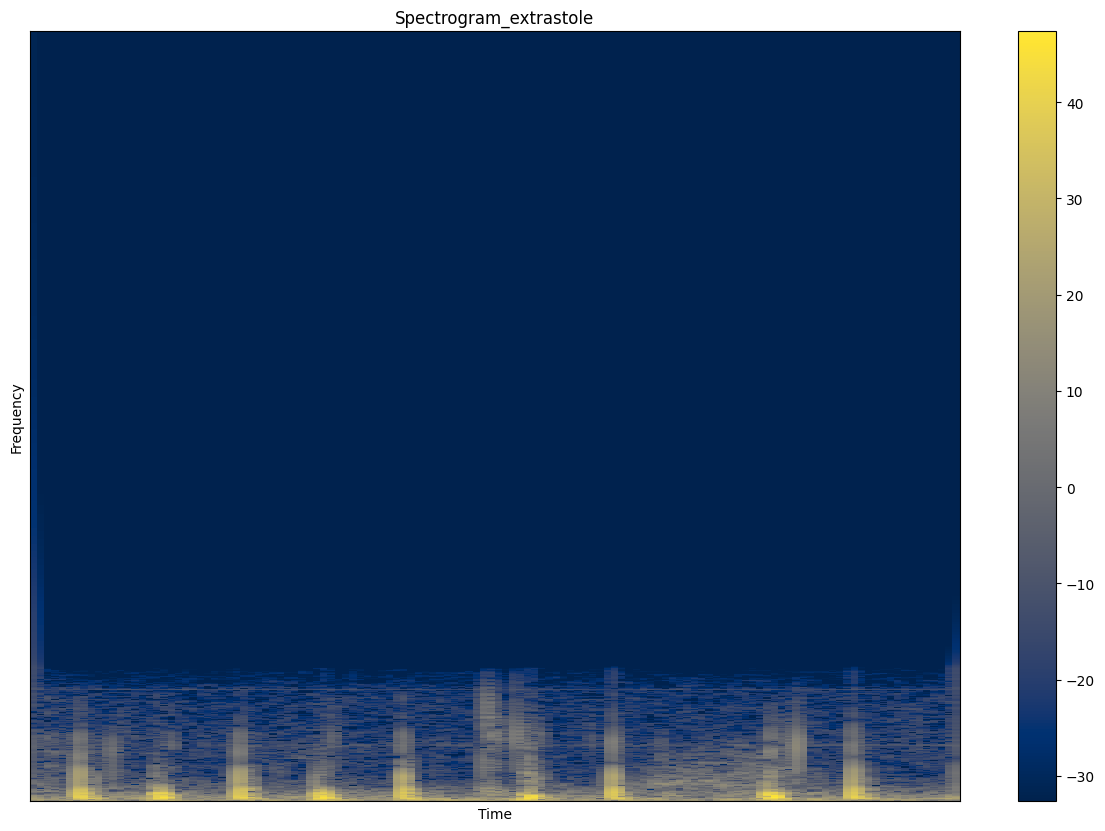

In [27]:
hop_length = 512
n_fft = 2048

hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

stft_extrastole = librosa.stft(extrastole_sound_sample, n_fft=n_fft, hop_length=hop_length)

spectrogram_extrastole = np.abs(stft_extrastole)
log_spectrogram_extrastole = librosa.amplitude_to_db(spectrogram_extrastole)

plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.set_cmap("cividis")
plt.title("Spectrogram_extrastole")

### MFCCs

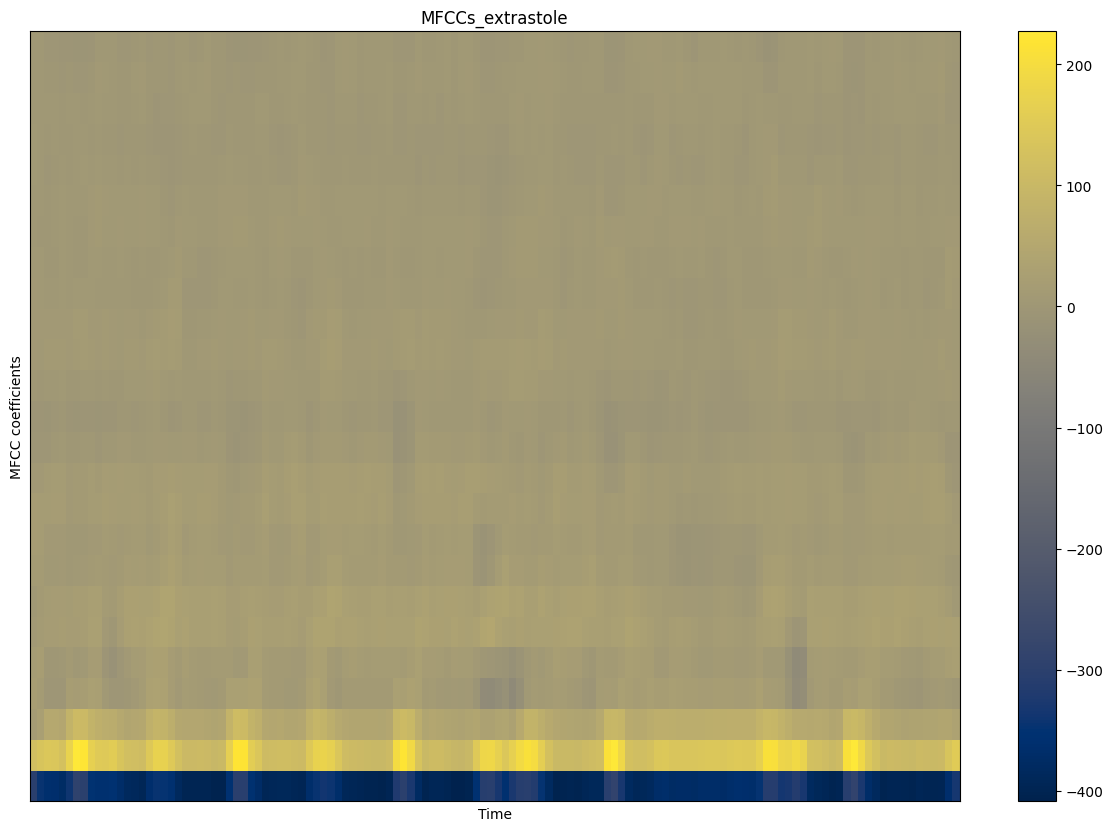

In [29]:
MFCCs_extrastole = librosa.feature.mfcc(y=extrastole_sound_sample, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.set_cmap("cividis")
plt.title("MFCCs_extrastole")
plt.show()

## *4. Artifact sound*

In [30]:
random_artifact= np.random.randint(0,len(os.listdir(artifact_data)))
artifact_sound = os.listdir(artifact_data)[random_artifact]
artifact_sound_address = artifact_data+artifact_sound
artifact_sound_sample,sample_rate = librosa.load(artifact_sound_address)
ipd.Audio(artifact_sound_sample,rate=sample_rate)

### Waveform

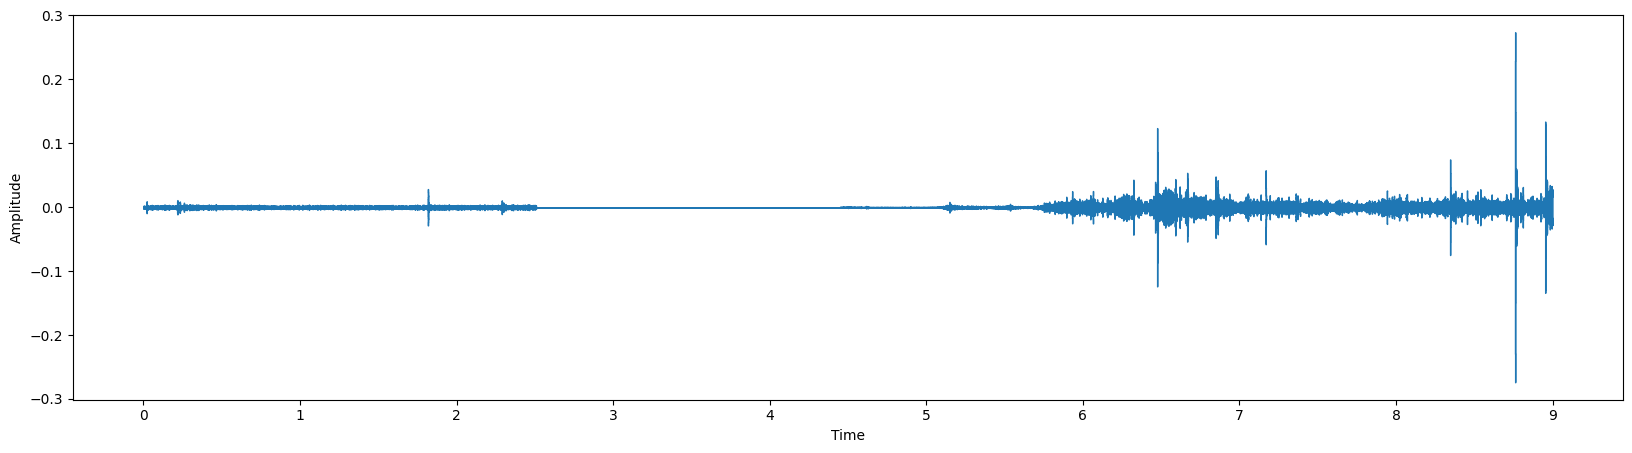

In [31]:
plt.figure(figsize=(20,5))
librosa.display.waveshow(artifact_sound_sample, sr = sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

### Spectrum

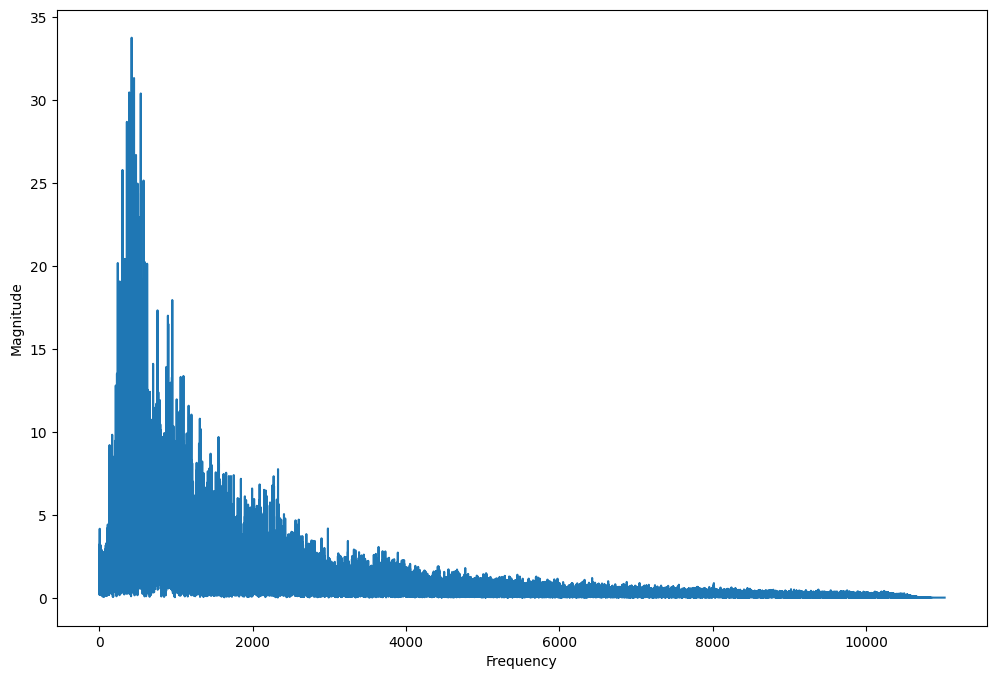

In [32]:
fft_artifact = np.fft.fft(artifact_sound_sample)
magnitude_artifact = np.abs(fft_artifact)
freq_artifact = np.linspace(0,sample_rate, len(magnitude_artifact))
half_freq = freq_artifact[:int(len(freq_artifact)/2)]
half_magnitude = magnitude_artifact[:int(len(freq_artifact)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq,half_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

### Spectogram

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram_artifacte')

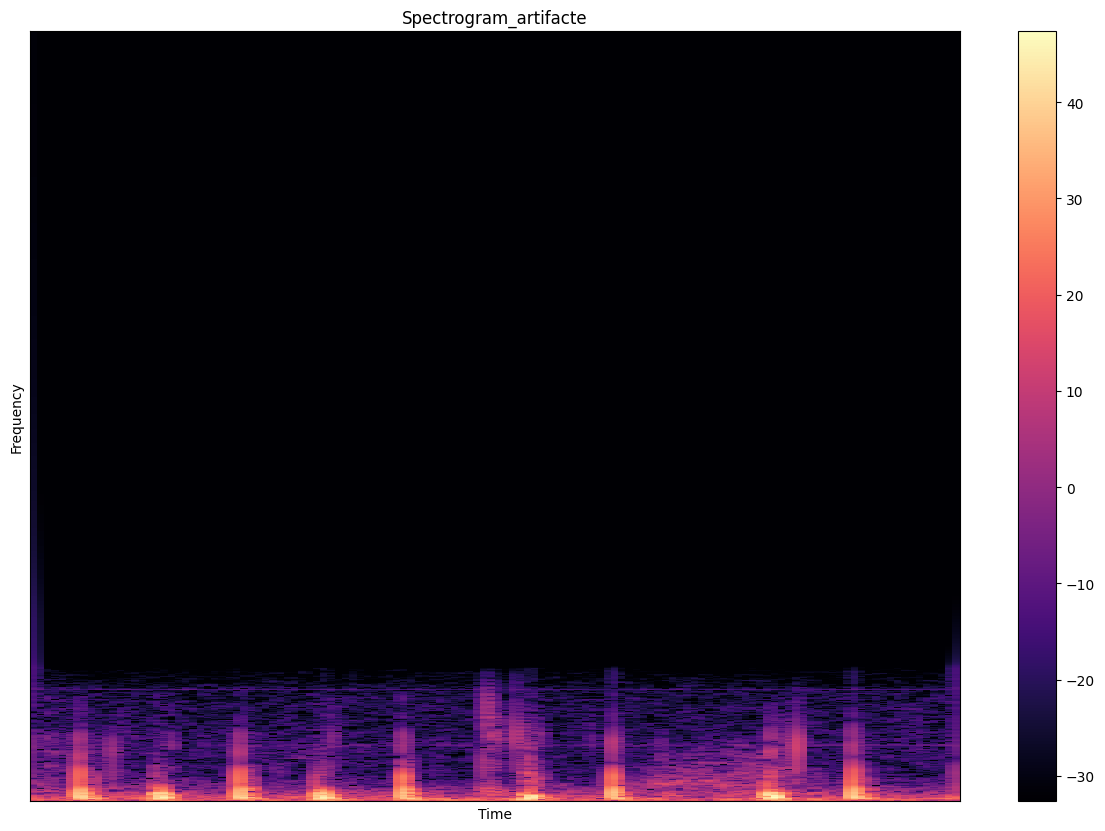

In [33]:
hop_length = 512
n_fft = 2048

hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

stft_artifact = librosa.stft(artifact_sound_sample, n_fft=n_fft, hop_length=hop_length)

spectrogram_artifact = np.abs(stft_artifact)
log_spectrogram_artifact = librosa.amplitude_to_db(spectrogram_artifact)

plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.set_cmap("magma")
plt.title("Spectrogram_artifacte")

### MFCCs

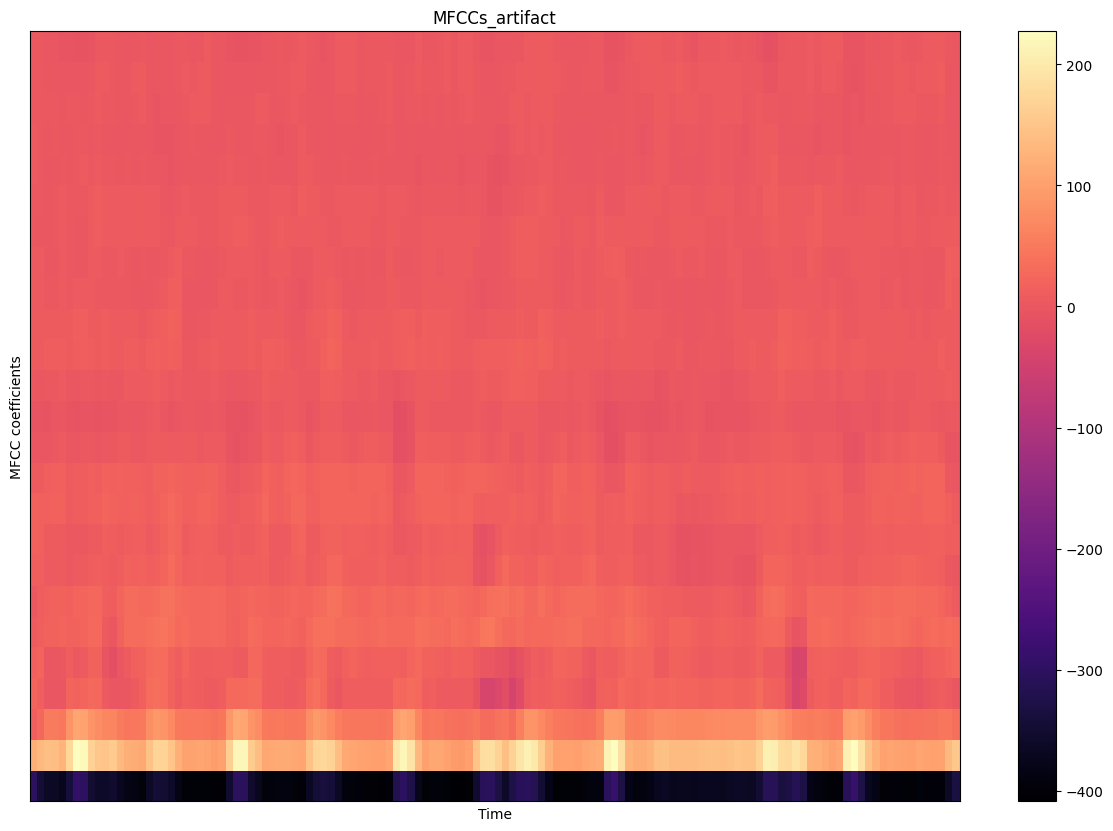

In [35]:
MFCCs_artifact = librosa.feature.mfcc(y=artifact_sound_sample, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.set_cmap("magma")
plt.title("MFCCs_artifact")
plt.show()

## *5. Extrahls sound*

In [36]:
random_extrahls= np.random.randint(0,len(os.listdir(extrahls_data)))
extrahls_sound = os.listdir(extrahls_data)[random_extrahls]
extrahls_sound_address = extrahls_data+extrahls_sound
extrahls_sound_sample,sample_rate = librosa.load(extrahls_sound_address)
ipd.Audio(extrahls_sound_sample,rate=sample_rate)

### Waveform

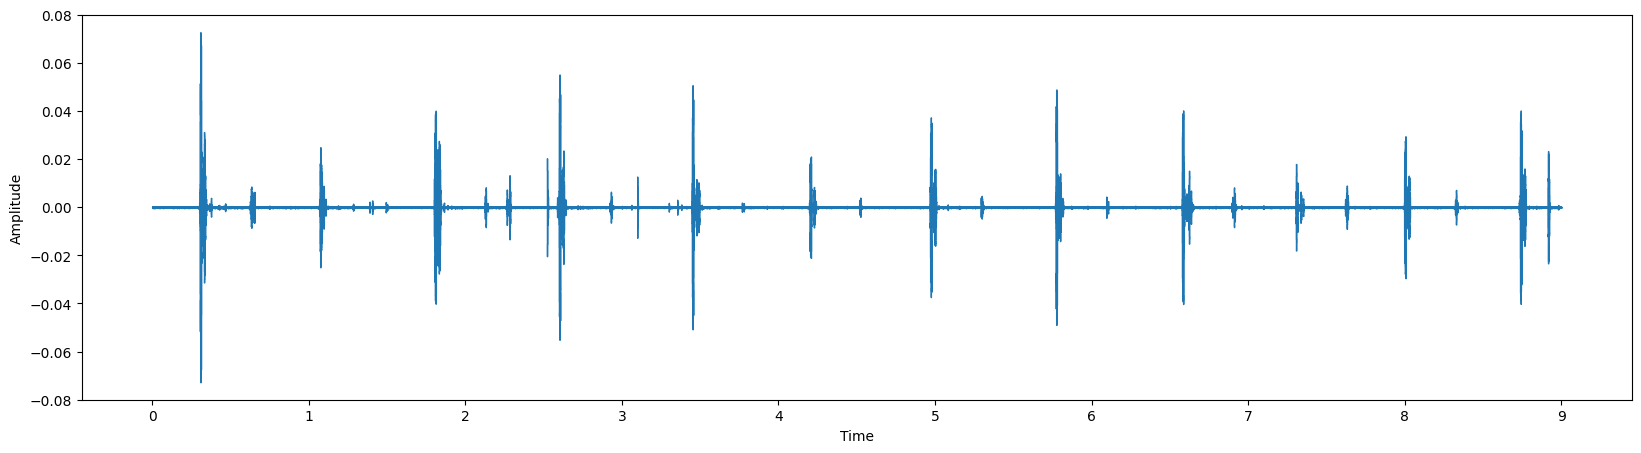

In [37]:
plt.figure(figsize=(20,5))
librosa.display.waveshow(extrahls_sound_sample, sr = sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

### Spectrum

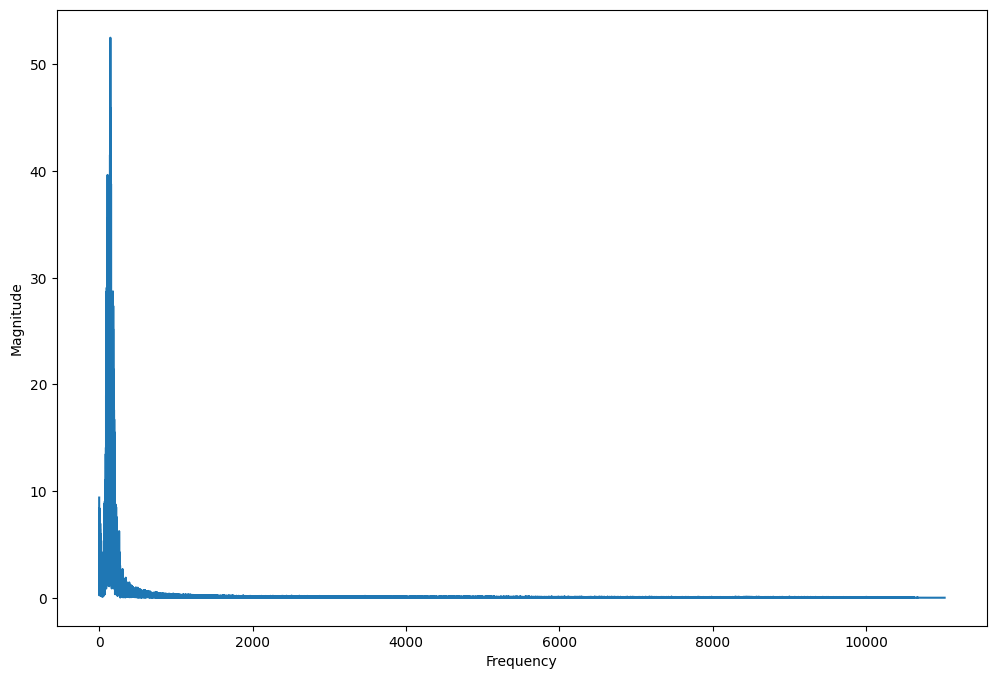

In [38]:
fft_extrahls = np.fft.fft(extrahls_sound_sample)
magnitude_extrahls = np.abs(fft_extrahls)
freq_extrahls = np.linspace(0,sample_rate, len(magnitude_extrahls))
half_freq = freq_extrahls[:int(len(freq_extrahls)/2)]
half_magnitude = magnitude_extrahls[:int(len(freq_extrahls)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq,half_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

### Spectogram

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram_extrahlse')

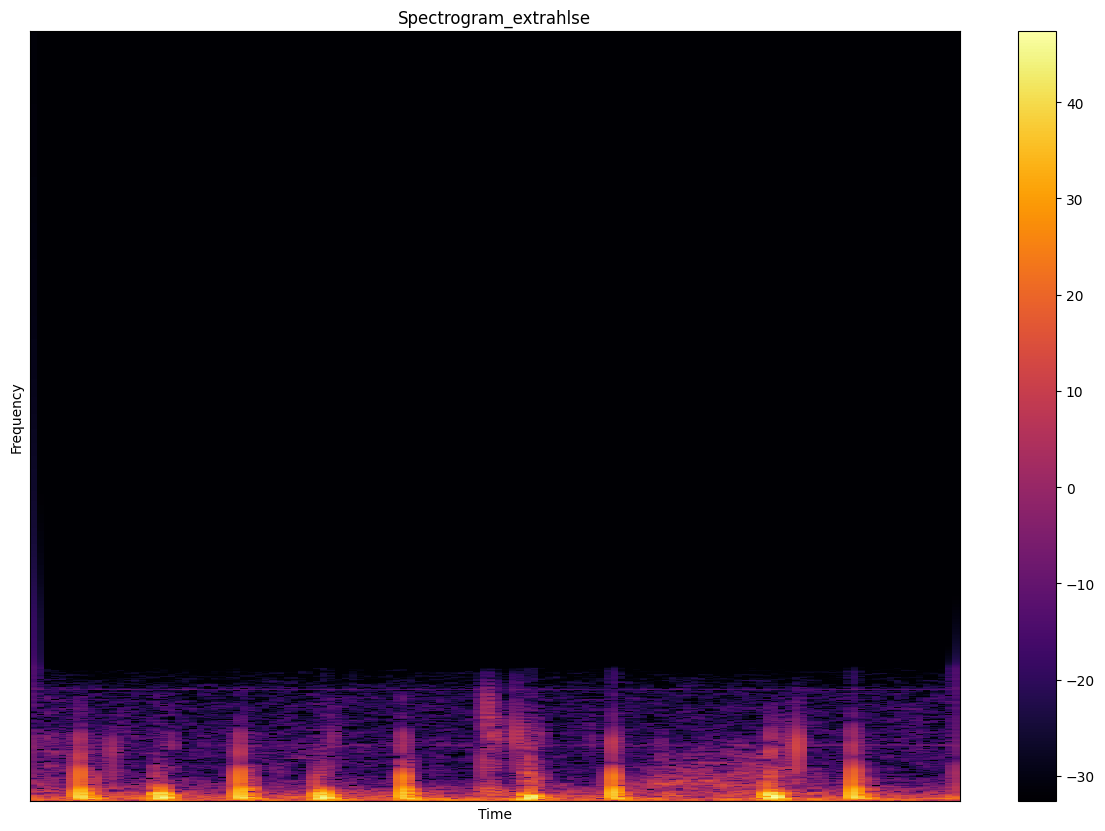

In [39]:
hop_length = 512
n_fft = 2048

hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

stft_extrahls = librosa.stft(extrahls_sound_sample, n_fft=n_fft, hop_length=hop_length)

spectrogram_extrahls = np.abs(stft_extrahls)
log_spectrogram_extrahls = librosa.amplitude_to_db(spectrogram_extrahls)

plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.set_cmap("inferno")
plt.title("Spectrogram_extrahlse")

### MFCCs

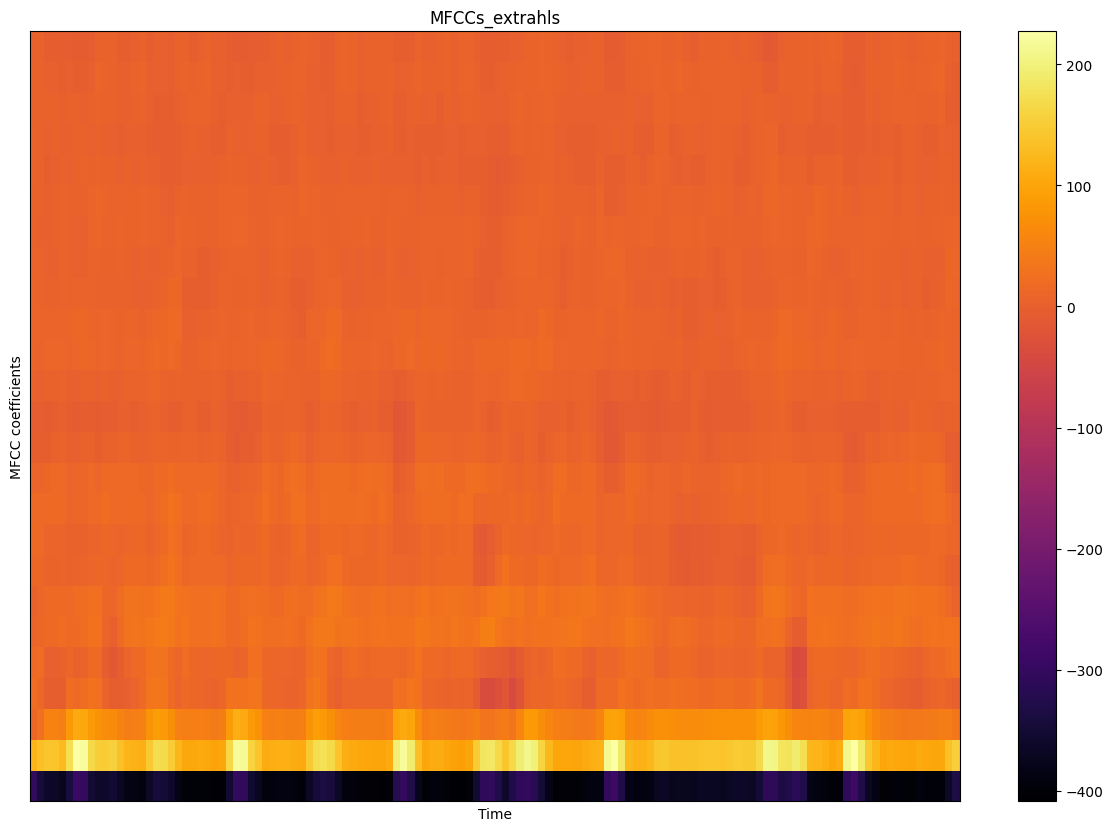

In [41]:
MFCCs_extrahls = librosa.feature.mfcc(y=extrahls_sound_sample, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.set_cmap("inferno")
plt.title("MFCCs_extrahls")
plt.show()

# Loading Data

In [45]:
def load_file_data (folder, file_names, duration=10, sr=22050):
    input_length=sr*duration
    data = []
    for file_name in file_names:
        try:
            sound_file=folder+file_name
            print ("load file ",sound_file)
            X, sr = librosa.load( sound_file, sr=sr, duration=duration)
            dur = librosa.get_duration(y=X, sr=sr)
            # pad audio file same duration
            if (round(dur) < duration):
                print ("fixing audio lenght :", file_name)
                y = librosa.util.fix_length(data=X, size=input_length)
            else: # if duration is sufficient, use the original data
                y = X
            # extract normalized mfcc feature from data
            mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=25).T,axis=0)
        except Exception as e:
            print("Error encountered while parsing file: ", file_name)
            print(e) # Print the actual exception for better debugging
        feature = np.array(mfccs).reshape([-1,1])
        data.append(feature)
    return data

# Preprocessing

## *Encoding*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

CLASSES = ['artifact','murmur','normal','extrastole','extrahls']
NB_CLASSES=len(CLASSES)

label_to_int = {k:v for v,k in enumerate(CLASSES)}
print (label_to_int)
print (" ")
int_to_label = {v:k for k,v in label_to_int.items()}
print(int_to_label)

{'artifact': 0, 'murmur': 1, 'normal': 2}
 
{0: 'artifact', 1: 'murmur', 2: 'normal'}


In [ ]:
SAMPLE_RATE = 22050
MAX_SOUND_CLIP_DURATION=10

artifact_files = fnmatch.filter(os.listdir(artifact_data), 'artifact*.wav')
artifact_sounds = load_file_data (folder=artifact_data, file_names = artifact_files, duration=MAX_SOUND_CLIP_DURATION)
artifact_labels = [0 for items in artifact_files]

normal_files = fnmatch.filter(os.listdir(normal_data), 'normal*.wav')
normal_sounds = load_file_data(folder=normal_data,file_names=normal_files, duration=MAX_SOUND_CLIP_DURATION)
normal_labels = [2 for items in normal_sounds]

extrahls_files = fnmatch.filter(os.listdir(extrahls_data), 'extrahls*.wav')
extrahls_sounds = load_file_data(folder=extrahls_data,file_names=extrahls_files, duration=MAX_SOUND_CLIP_DURATION)
extrahls_labels = [4 for items in extrahls_sounds]

murmur_files = fnmatch.filter(os.listdir(murmur_data), 'murmur*.wav')
murmur_sounds = load_file_data(folder=murmur_data,file_names=murmur_files, duration=MAX_SOUND_CLIP_DURATION)
murmur_labels = [1 for items in murmur_files]

extrastole_files = fnmatch.filter(os.listdir(extrastole_data), 'extrastole*.wav')
extrastole_sounds = load_file_data(folder=extrastole_data,file_names=extrastole_files, duration=MAX_SOUND_CLIP_DURATION)
extrastole_labels = [3 for items in extrastole_files]

print ("Loading Done")


load file  /root/.cache/kagglehub/datasets/abdallahaboelkhair/heartbeat-sound/versions/1/Heartbeat_Sound/artifact/artifact__201106161219.wav
fixing audio lenght : artifact__201106161219.wav
load file  /root/.cache/kagglehub/datasets/abdallahaboelkhair/heartbeat-sound/versions/1/Heartbeat_Sound/artifact/artifact__201105040918.wav
fixing audio lenght : artifact__201105040918.wav
load file  /root/.cache/kagglehub/datasets/abdallahaboelkhair/heartbeat-sound/versions/1/Heartbeat_Sound/artifact/artifact__201106131834.wav
fixing audio lenght : artifact__201106131834.wav
load file  /root/.cache/kagglehub/datasets/abdallahaboelkhair/heartbeat-sound/versions/1/Heartbeat_Sound/artifact/artifact__201012172012.wav
fixing audio lenght : artifact__201012172012.wav
load file  /root/.cache/kagglehub/datasets/abdallahaboelkhair/heartbeat-sound/versions/1/Heartbeat_Sound/artifact/artifact__201105190800.wav
fixing audio lenght : artifact__201105190800.wav
load file  /root/.cache/kagglehub/datasets/abdalla

In [48]:
Bunlabelledtest_files = fnmatch.filter(os.listdir(unlabel_data), 'Bunlabelledtest*.wav')
Bunlabelledtest_sounds = load_file_data(folder=unlabel_data,file_names=Bunlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
Bunlabelledtest_labels = [-1 for items in Bunlabelledtest_sounds]

Aunlabelledtest_files = fnmatch.filter(os.listdir(unlabel_data), 'Aunlabelledtest*.wav')
Aunlabelledtest_sounds = load_file_data(folder=unlabel_data,file_names=Aunlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
Aunlabelledtest_labels = [-1 for items in Aunlabelledtest_sounds]


print ("Loading of unlabel data done")

load file  /root/.cache/kagglehub/datasets/abdallahaboelkhair/heartbeat-sound/versions/1/Heartbeat_Sound/unlabel/Bunlabelledtest__213_1308245263936_B.wav
fixing audio lenght : Bunlabelledtest__213_1308245263936_B.wav
load file  /root/.cache/kagglehub/datasets/abdallahaboelkhair/heartbeat-sound/versions/1/Heartbeat_Sound/unlabel/Bunlabelledtest__149_1306776016110_C.wav
fixing audio lenght : Bunlabelledtest__149_1306776016110_C.wav
load file  /root/.cache/kagglehub/datasets/abdallahaboelkhair/heartbeat-sound/versions/1/Heartbeat_Sound/unlabel/Bunlabelledtest__282_1311166081161_D.wav
fixing audio lenght : Bunlabelledtest__282_1311166081161_D.wav
load file  /root/.cache/kagglehub/datasets/abdallahaboelkhair/heartbeat-sound/versions/1/Heartbeat_Sound/unlabel/Bunlabelledtest__184_1308073010307_C.wav
fixing audio lenght : Bunlabelledtest__184_1308073010307_C.wav
load file  /root/.cache/kagglehub/datasets/abdallahaboelkhair/heartbeat-sound/versions/1/Heartbeat_Sound/unlabel/Bunlabelledtest__20

## *concatenation*

In [49]:
x_data = np.concatenate((artifact_sounds, normal_sounds, extrahls_sounds, murmur_sounds, extrastole_sounds))

y_data = np.concatenate((artifact_labels, normal_labels, extrahls_labels, murmur_labels, extrastole_labels))

test_x = np.concatenate((Aunlabelledtest_sounds,Bunlabelledtest_sounds))
test_y = np.concatenate((Aunlabelledtest_labels,Bunlabelledtest_labels))

print ("combined training data record: ",len(y_data), len(test_y))

combined training data record:  585 247


In [50]:
x_data.shape

(585, 25, 1)

## *train_test_validation split*

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.8, random_state=42, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, random_state=42, shuffle=True)

# Tampilkan persentase split dataset
total_data = len(x_data)
print("=== PEMBAGIAN DATASET ===")
print(f"Total data: {total_data}")
print(f"Train set: {len(x_train)} ({len(x_train)/total_data*100:.1f}%)")
print(f"Validation set: {len(x_val)} ({len(x_val)/total_data*100:.1f}%)")
print(f"Test set: {len(x_test)} ({len(x_test)/total_data*100:.1f}%)")
print()

# Simpan label sebelum dikonversi untuk class weight calculation
y_train_labels = y_train.copy()

# Convert ke categorical
y_train = np.array(tf.keras.utils.to_categorical(y_train, len(CLASSES)))
y_test = np.array(tf.keras.utils.to_categorical(y_test, len(CLASSES)))
y_val = np.array(tf.keras.utils.to_categorical(y_val, len(CLASSES)))
test_y=np.array(tf.keras.utils.to_categorical(test_y, len(CLASSES)))

### Correct imbalanced data using class weight

In [ ]:
# Calculate class weights for 5 classes
TRAIN_IMG_COUNT = len(x_train)
# Count samples per class in training set (menggunakan y_train_labels dari cell sebelumnya)
COUNT_0 = np.sum(y_train_labels == 0)  # artifact
COUNT_1 = np.sum(y_train_labels == 1)  # murmur
COUNT_2 = np.sum(y_train_labels == 2)  # normal
COUNT_3 = np.sum(y_train_labels == 3)  # extrastole
COUNT_4 = np.sum(y_train_labels == 4)  # extrahls

weight_for_0 = TRAIN_IMG_COUNT / (5 * COUNT_0)
weight_for_1 = TRAIN_IMG_COUNT / (5 * COUNT_1)
weight_for_2 = TRAIN_IMG_COUNT / (5 * COUNT_2)
weight_for_3 = TRAIN_IMG_COUNT / (5 * COUNT_3)
weight_for_4 = TRAIN_IMG_COUNT / (5 * COUNT_4)

class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2, 3: weight_for_3, 4: weight_for_4}
print("=== CLASS WEIGHTS ===")
print(f"Artifact (0): {weight_for_0:.4f} (count: {COUNT_0})")
print(f"Murmur (1): {weight_for_1:.4f} (count: {COUNT_1})")
print(f"Normal (2): {weight_for_2:.4f} (count: {COUNT_2})")
print(f"Extrastole (3): {weight_for_3:.4f} (count: {COUNT_3})")
print(f"Extrahls (4): {weight_for_4:.4f} (count: {COUNT_4})")
print()
class_weight

{0: 4.816666666666666, 1: 1.4935400516795865, 2: 0.4710676446617767}

# LSTM Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, LSTM, Bidirectional, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau, ModelCheckpoint,TensorBoard,ProgbarLogger
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

In [ ]:
model = Sequential()

model.add(Bidirectional(LSTM(128, dropout=0.05, recurrent_dropout=0.20, return_sequences=True), input_shape = (25,1)))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Flatten())

model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(1e-4), metrics=['acc'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 25, 256)        │       133,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25, 128)        │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25, 128)        │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25, 64)         │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 25, 64)         │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │         4,803 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 199,747 (780.26 KB)

 Trainable params: 199,747 (780.26 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
weight_saver = ModelCheckpoint('set_a_weights.weights.h5', monitor='val_loss',
                               save_best_only=True, save_weights_only=True)
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.8**x)

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
history=model.fit(x_train, y_train,
                  batch_size=3,
                  epochs=30,
                  class_weight=class_weight,
                  callbacks=[weight_saver, annealer, early_stop],
                  validation_data=(x_val, y_val))

Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 105ms/step - acc: 0.5619 - loss: 0.8225 - val_acc: 0.7766 - val_loss: 0.5826 - learning_rate: 0.0010
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - acc: 0.6283 - loss: 0.6519 - val_acc: 0.6383 - val_loss: 0.6877 - learning_rate: 8.0000e-04
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - acc: 0.6740 - loss: 0.5000 - val_acc: 0.7128 - val_loss: 0.5561 - learning_rate: 6.4000e-04
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 22s 100ms/step - acc: 0.7424 - loss: 0.4628 - val_acc: 0.7553 - val_loss: 0.5138 - learning_rate: 5.1200e-04
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - acc: 0.7477 - loss: 0.4391 - val_acc: 0.7553 - val_loss: 0.5970 - learning_rate: 4.0960e-04
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 100ms/step - acc: 0.6733 - loss: 0.4263 - val_acc: 0.7660 - val_loss: 0.5552 - learning_rate: 3.2768e-04
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - acc: 0.7462 - loss: 0.4117 - val_acc: 0.7340 - val_loss: 

<Axes: >

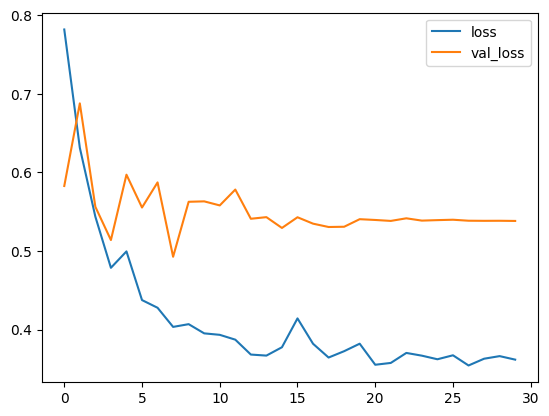

In [59]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

<Axes: >

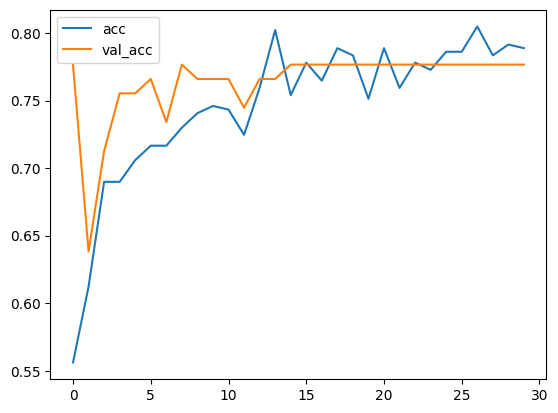

In [60]:
losses[['acc','val_acc']].plot()

# Prediction

In [61]:
y_pred = model.predict(x_test, batch_size=5)
scores = model.evaluate(x_test, y_test)
print ("Model evaluation accuracy: ", round(scores[1]*100),"%")

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - acc: 0.7763 - loss: 0.7164
Model evaluation accuracy:  79 %


# Saving and loading model

In [62]:
model.save('heart_sounds.h5')

In [63]:
# prediction class
y_pred = np.asarray(model.predict(x_test, batch_size=32))
y_pred = np.argmax(y_pred,axis=1)
print ("prediction test return :",y_pred[1], "-", int_to_label[y_pred[1]])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
prediction test return : 2 - normal


In [64]:
def preprocessing (file_path, duration=10, sr=22050):
  input_length=sr*duration
  process_file=[]
  X, sr = librosa.load(file_path, sr=sr, duration=duration)
  dur = librosa.get_duration(y=X, sr=sr)
  if (round(dur) < duration):
    y = librosa.util.fix_length(X, input_length)
  mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40, n_fft=512,hop_length=2048).T,axis=0)
  feature = np.array(mfccs).reshape([-1,1])
  process_file.append(feature)
  process_file_array = np.asarray(process_file)
  return process_file_array

In [65]:
y_pred = np.asarray(model.predict(x_test, batch_size=32))
y_pred = np.argmax(y_pred,axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [ ]:
# Visualisasi Confusion Matrix
# Pastikan nama kelas terdefinisi sebelum dipakai
target_names = ["artifact", "murmur", "normal", "extrastole", "extrahls"]

y_test_labels = y_test.argmax(axis=1)

cm = confusion_matrix(y_test_labels, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, 
            yticklabels=target_names,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Heartbeat Classification', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# Print confusion matrix values
print("\n=== CONFUSION MATRIX ===")
print("Labels:", target_names)
print("\nMatrix:")
print(cm)


In [ ]:
target_names = ["artifact", "murmur", "normal", "extrastole", "extrahls"]
print(classification_report(y_test.argmax(axis=1), y_pred, target_names = target_names))

              precision    recall  f1-score   support

    artifact       0.78      0.88      0.82         8
      murmur       0.48      0.64      0.55        22
      normal       0.91      0.83      0.87        87

    accuracy                           0.79       117
   macro avg       0.72      0.78      0.75       117
weighted avg       0.82      0.79      0.80       117



In [ ]:
# Export notebook to PDF (requires TeX; if not available, export to HTML instead)
# Jalankan salah satu perintah di bawah sesuai lingkungan Anda.

# Opsi 1: Ekspor ke PDF langsung (butuh LaTeX/TeX Live)
# !jupyter nbconvert --to pdf "Heartbeat_classification.ipynb" --output "Heartbeat_classification.pdf"

# Opsi 2: Jika PDF gagal, ekspor ke HTML sebagai alternatif laporan
# !jupyter nbconvert --to html "Heartbeat_classification.ipynb" --output "Heartbeat_classification.html"

print("Siap ekspor. Gunakan salah satu perintah di atas sesuai ketersediaan TeX.")


In [ ]:
# CNN model as comparison
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, Input

num_classes = y_train.shape[1]
input_shape = (x_train.shape[1], x_train.shape[2])  # expected (25, 1)

cnn_model = Sequential([
    Input(shape=input_shape),
    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Flatten(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  loss='categorical_crossentropy',
                  metrics=['acc'])

cnn_model.summary()


In [ ]:
# Train and evaluate CNN model
from tensorflow.keras.callbacks import ModelCheckpoint

cnn_weight_saver = ModelCheckpoint('cnn_weights.weights.h5', monitor='val_loss',
                                   save_best_only=True, save_weights_only=True)

cnn_callbacks = []
try:
    cnn_callbacks = [cnn_weight_saver, annealer, early_stop]
except NameError:
    cnn_callbacks = [cnn_weight_saver]

cnn_history = cnn_model.fit(
    x_train, y_train,
    batch_size=3,
    epochs=30,
    class_weight=class_weight,
    callbacks=cnn_callbacks,
    validation_data=(x_val, y_val)
)

cnn_scores = cnn_model.evaluate(x_test, y_test, verbose=1)
print("CNN evaluation accuracy:", round(cnn_scores[1]*100), "%")

# Optional: compare with previous (BiLSTM) model if available
try:
    print("Previous model evaluation accuracy:", round(scores[1]*100), "%")
except Exception:
    pass


In [ ]:
# Prepare data for Random Forest (flatten features and convert labels)
import numpy as np

X_train_rf = x_train.reshape((x_train.shape[0], -1))
X_val_rf   = x_val.reshape((x_val.shape[0], -1))
X_test_rf  = x_test.reshape((x_test.shape[0], -1))

y_train_rf = np.argmax(y_train, axis=1)
y_val_rf   = np.argmax(y_val, axis=1)
y_test_rf  = np.argmax(y_test, axis=1)

X_train_rf.shape, X_val_rf.shape, X_test_rf.shape


In [ ]:
# Train and evaluate Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1,
    class_weight='balanced_subsample',
    random_state=42
)

rf.fit(X_train_rf, y_train_rf)

# Validation performance (optional)
val_pred = rf.predict(X_val_rf)
val_acc = accuracy_score(y_val_rf, val_pred)
print(f"RF validation accuracy: {val_acc*100:.2f}%")

# Test performance
rf_test_pred = rf.predict(X_test_rf)
rf_test_acc = accuracy_score(y_test_rf, rf_test_pred)
print(f"RF test accuracy: {rf_test_acc*100:.2f}%")

print("\nRF classification report (test):")
print(classification_report(y_test_rf, rf_test_pred, target_names=["artifact","murmur","normal","extrastole","extrahls"]))

cm_rf = confusion_matrix(y_test_rf, rf_test_pred)
print("Confusion matrix (test):\n", cm_rf)


In [ ]:
# RandomizedSearchCV: tune Random Forest for macro-F1 (better minority recall)
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import f1_score, make_scorer, accuracy_score, classification_report, confusion_matrix
from scipy.stats import randint, uniform

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(f1_score, average='macro')

rf_base = RandomForestClassifier(random_state=42, n_jobs=-1)

param_distributions = {
    'n_estimators': randint(300, 1001),
    'max_depth': [None] + list(range(10, 61, 10)),
    'max_features': ['sqrt', 'log2', 0.5, 0.7, 0.9],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'class_weight': ['balanced', 'balanced_subsample']
}

search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_distributions,
    n_iter=40,
    scoring=scorer,
    cv=cv,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

search.fit(X_train_rf, y_train_rf)
print("Best macro-F1 (CV):", search.best_score_)
print("Best params:", search.best_params_)

rf_tuned = search.best_estimator_

# Validation and Test
val_pred_tuned = rf_tuned.predict(X_val_rf)
val_macro_f1 = f1_score(y_val_rf, val_pred_tuned, average='macro')
print(f"Tuned RF validation macro-F1: {val_macro_f1:.3f}; accuracy: {accuracy_score(y_val_rf, val_pred_tuned)*100:.2f}%")

rf_test_pred_tuned = rf_tuned.predict(X_test_rf)
rf_test_macro_f1 = f1_score(y_test_rf, rf_test_pred_tuned, average='macro')
print(f"Tuned RF test macro-F1: {rf_test_macro_f1:.3f}; accuracy: {accuracy_score(y_test_rf, rf_test_pred_tuned)*100:.2f}%")

print("\nTuned RF classification report (test):")
print(classification_report(y_test_rf, rf_test_pred_tuned, target_names=["artifact","murmur","normal","extrastole","extrahls"]))

cm_tuned = confusion_matrix(y_test_rf, rf_test_pred_tuned)
print("Confusion matrix (tuned RF, test):\n", cm_tuned)


In [ ]:
# Handle class imbalance: SMOTE + BalancedRandomForest (fallback if imblearn not installed)
try:
    from imblearn.over_sampling import SMOTE
    from imblearn.ensemble import BalancedRandomForestClassifier
    from imblearn.pipeline import Pipeline as ImbPipeline

    # SMOTE on training only; keep validation and test untouched
    smote = SMOTE(random_state=42, k_neighbors=3)

    brf = BalancedRandomForestClassifier(
        n_estimators=600,
        max_depth=None,
        max_features='sqrt',
        sampling_strategy='auto',
        random_state=42,
        n_jobs=-1
    )

    imb_model = ImbPipeline(steps=[('smote', smote), ('brf', brf)])
    imb_model.fit(X_train_rf, y_train_rf)

    # Validation
    imb_val_pred = imb_model.predict(X_val_rf)
    imb_val_macro_f1 = f1_score(y_val_rf, imb_val_pred, average='macro')
    print(f"Imbalanced RF validation macro-F1: {imb_val_macro_f1:.3f}; accuracy: {accuracy_score(y_val_rf, imb_val_pred)*100:.2f}%")

    # Test
    imb_test_pred = imb_model.predict(X_test_rf)
    imb_test_macro_f1 = f1_score(y_test_rf, imb_test_pred, average='macro')
    print(f"Imbalanced RF test macro-F1: {imb_test_macro_f1:.3f}; accuracy: {accuracy_score(y_test_rf, imb_test_pred)*100:.2f}%")

    print("\nImbalanced RF classification report (test):")
    print(classification_report(y_test_rf, imb_test_pred, target_names=["artifact","murmur","normal","extrastole","extrahls"]))

    cm_imb = confusion_matrix(y_test_rf, imb_test_pred)
    print("Confusion matrix (Imbalanced RF, test):\n", cm_imb)

except ImportError as e:
    print("imblearn is not installed. To try SMOTE + BalancedRandomForest, install with:")
    print("pip install imbalanced-learn")
